## Simulated Portfolios: Performance Review January 2023 - September 2023

In this exercise we compare the performance of cryptoasset portfolios between 1st January 2023 and 1st September 2023. 
We use data from **Coinmarketcap-API**. Specifically, we use the **daily close quotes in USD**. Three portfolios are compared:
- Altcoin-portfolio consisting of: *Binance Coin (BNB), Ripple (XRP), Solana (SOL), Cardano (ADA), Dogecoin (DOGE)*
- Ethereum-portfolio consisting of: *Ethereum (ETH)*
- Bitcoin-portfolio consisting of: *Bitcoin (BTC)*

For the altcoin-portfolio we assume that all constituents have equal weight. The goal of this exercise is to determine whether holding only Bitcoin throughout 2023 has been the superior positioning.

In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyfolio as pf
import matplotlib as plt
import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

In [81]:
# Load the data and transform
coins = ["bitcoin","ethereum","bnb","xrp","solana","cardano","dogecoin"]

for coin in coins:
    filename = "tmp/"+coin+".csv"
    coin = pd.read_csv(filename, parse_dates=True, index_col=0)
    coin = coin["Close"]
    
# Combine Close-Price time series into a single data frame
df_alts = pd.concat([bnb, xrp, sol, ada, doge], axis=1)
df_alts = df_alts.set_axis(['bnb', 'xrp', 'sol', 'ada', 'doge'], axis=1)

df_btc = pd.concat([btc], axis=1)
df_btc = df_btc.set_axis(['btc'], axis=1)

df_eth = pd.concat([eth], axis=1)
df_eth = df_eth.set_axis(['eth'], axis=1)

mask = (df_alts.index > '2023-01-01') & (df_alts.index < '2023-09-01')
df_alts = df_alts.loc[mask]

mask = (df_btc.index > '2023-01-01') & (df_btc.index < '2023-09-01')
df_btc = df_btc.loc[mask]

mask = (df_eth.index > '2023-01-01') & (df_eth.index < '2023-09-01')
df_eth = df_eth.loc[mask]

In [82]:
# Calculate daily returns
daily_returns_alts = df_alts.pct_change().dropna()
portfolio_daily_returns_alts = daily_returns_alts.mean(axis=1) # compute mean return over whole portfolio!

portfolio_daily_returns_btc = df_btc.pct_change().dropna()

portfolio_daily_returns_eth = df_eth.pct_change().dropna()

In [83]:
# Annual Return
def anret(portfolio_daily_returns):
    return np.asarray((1 + portfolio_daily_returns).prod() ** (365 / len(portfolio_daily_returns)) - 1)

annual_return_alts = anret(portfolio_daily_returns_alts)
annual_return_btc = anret(portfolio_daily_returns_btc)
annual_return_eth = anret(portfolio_daily_returns_eth)

# Cumulative Returns
def cumret(portfolio_daily_returns):
    return (1 + portfolio_daily_returns).cumprod() - 1

cumulative_returns_alts = cumret(portfolio_daily_returns_alts)
cumulative_returns_btc = cumret(portfolio_daily_returns_btc)["btc"]
cumulative_returns_eth = cumret(portfolio_daily_returns_eth)["eth"]

# Annual Volatility
def vola(portfolio_daily_returns):
    return portfolio_daily_returns.std() * (365 ** 0.5) # 365 b/c crypto is open 365 days per year

annual_volatility_alts = vola(portfolio_daily_returns_alts)
annual_volatility_btc = vola(portfolio_daily_returns_btc)["btc"]
annual_volatility_eth = vola(portfolio_daily_returns_eth)["eth"]

# Sharpe Ratio (assuming a risk-free rate of 0.04)
def sharpe(risk_free_rate, annual_return, annual_volatility):
    return (annual_return - risk_free_rate) / annual_volatility

risk_free_rate = 0.04 # US Treasury bill ~4% p.a.
sharpe_ratio_alts = sharpe(risk_free_rate, annual_return_alts, annual_volatility_alts)
sharpe_ratio_btc = sharpe(risk_free_rate, annual_return_btc, annual_volatility_btc)
sharpe_ratio_eth = sharpe(risk_free_rate, annual_return_eth, annual_volatility_eth)

# Max Drawdown
def max_dd(portfolio_daily_returns):
    cumulative_wealth = (1 + portfolio_daily_returns).cumprod()
    previous_peaks = cumulative_wealth.cummax()
    drawdowns = (cumulative_wealth - previous_peaks) / previous_peaks
    max_drawdown = drawdowns.min()
    return max_drawdown

max_drawdown_alts = max_dd(portfolio_daily_returns_alts)
max_drawdown_btc = max_dd(portfolio_daily_returns_btc)
max_drawdown_eth = max_dd(portfolio_daily_returns_eth)

# Daily Value at Risk (VaR) at 95% confidence
daily_var_95_alts = portfolio_daily_returns_alts.quantile(0.05)
daily_var_95_btc = portfolio_daily_returns_btc.quantile(0.05)
daily_var_95_eth = portfolio_daily_returns_eth.quantile(0.05)

print("ALTCOIN-Portfolio-Performance")
print(f"Annual Return: {annual_return_alts:.2%}")
print(f"Cumulative Returns (last date): {cumulative_returns_alts[-1]:.2%}")
print(f"Annual Volatility: {annual_volatility_alts:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio_alts:.2f}")
print(f"Max Drawdown: {max_drawdown_alts:.2%}")
print(f"Daily Value at Risk (95% confidence): {daily_var_95_alts:.2%}")
print("\n\n")
print("BITCOIN-Portfolio-Performance")
print(f"Annual Return: {float(annual_return_btc):.2%}")
print(f"Cumulative Returns (last date): {cumulative_returns_btc[-1]:.2%}")
print(f"Annual Volatility: {annual_volatility_btc:.2%}")
print(f"Sharpe Ratio: {float(sharpe_ratio_btc):.2f}")
print(f"Max Drawdown: {float(max_drawdown_btc):.2%}")
print(f"Daily Value at Risk (95% confidence): {float(daily_var_95_btc):.2%}")
print("\n\n")
print("ETHEREUM-Portfolio-Performance")
print(f"Annual Return: {float(annual_return_eth):.2%}")
print(f"Cumulative Returns (last date): {cumulative_returns_eth[-1]:.2%}")
print(f"Annual Volatility: {annual_volatility_eth:.2%}")
print(f"Sharpe Ratio: {float(sharpe_ratio_eth):.2f}")
print(f"Max Drawdown: {float(max_drawdown_eth):.2%}")
print(f"Daily Value at Risk (95% confidence): {float(daily_var_95_eth):.2%}")

ALTCOIN-Portfolio-Performance
Annual Return: 37.94%
Cumulative Returns (last date): 23.66%
Annual Volatility: 61.36%
Sharpe Ratio: 0.55
Max Drawdown: -32.19%
Daily Value at Risk (95% confidence): -4.64%



BITCOIN-Portfolio-Performance
Annual Return: 94.94%
Cumulative Returns (last date): 55.39%
Annual Volatility: 45.91%
Sharpe Ratio: 1.98
Max Drawdown: -18.70%
Daily Value at Risk (95% confidence): -3.27%



ETHEREUM-Portfolio-Performance
Annual Return: 58.39%
Cumulative Returns (last date): 35.48%
Annual Volatility: 47.62%
Sharpe Ratio: 1.14
Max Drawdown: -22.93%
Daily Value at Risk (95% confidence): -3.82%


### Interpreation / Result

Between January 2023 and September 2023 holding only BTC has been the superior alternative both in terms of returns and volatility. Holding a selection of altcoins (BNB, XRP, SOL, ADA, DOGE) would yield a positive return, but given the high "risk-free" interest rate (US Treasury Billd ~4%) the risk would not be justified. 

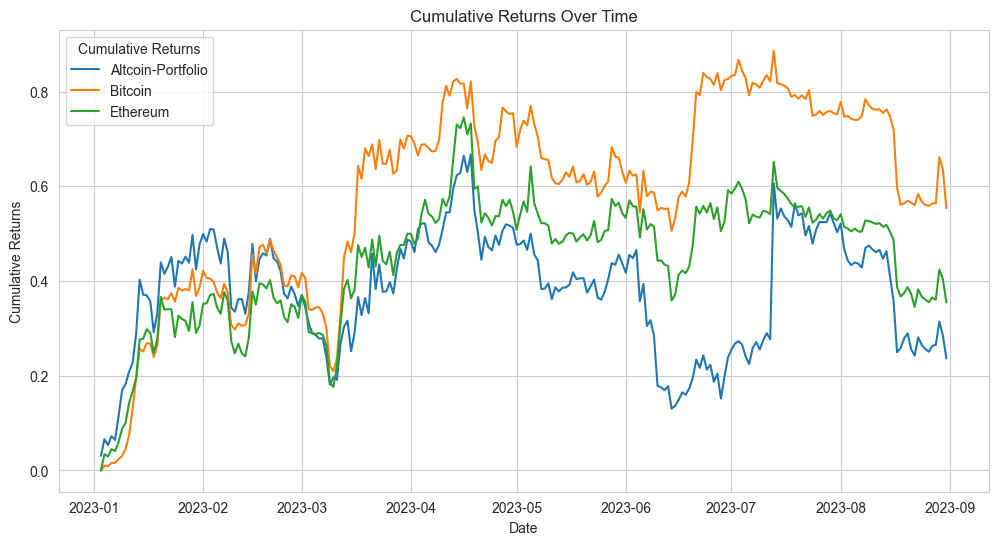

In [85]:
import matplotlib.pyplot as plt
# Plot Cumulative Returns
plt.figure(figsize=(12, 6))
plt.title("Cumulative Returns Over Time")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.plot(cumulative_returns_alts.index, cumulative_returns_alts.values) 
plt.plot(cumulative_returns_btc.index, cumulative_returns_btc.values)  
plt.plot(cumulative_returns_eth.index, cumulative_returns_eth.values) 
plt.legend(title="Cumulative Returns", labels=list(["Altcoin-Portfolio", "Bitcoin", "Ethereum"]))
plt.show()

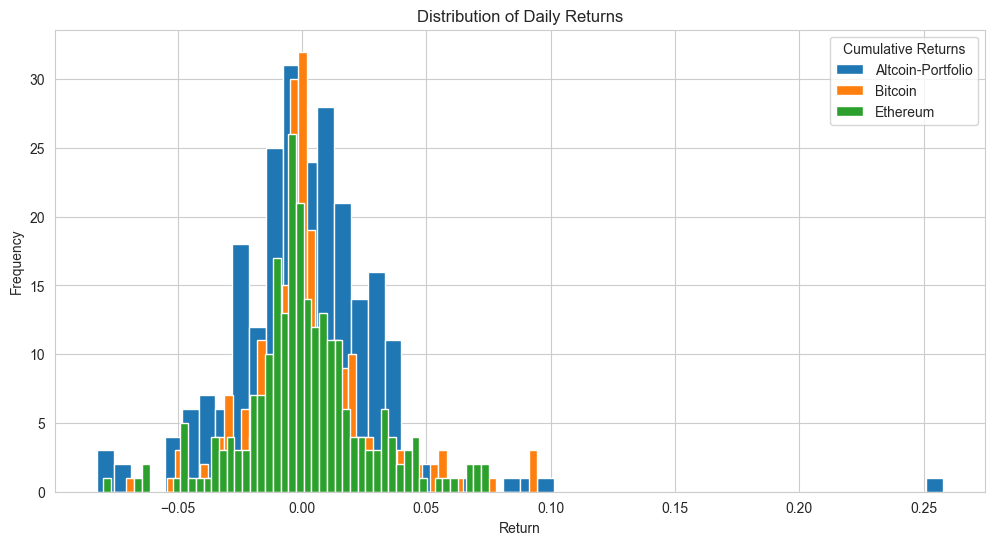

In [86]:
# Plot Daily Returns with Distribution (Histogram)
plt.figure(figsize=(12, 6)) 
plt.hist(portfolio_daily_returns_alts, bins=50)
plt.hist(portfolio_daily_returns_btc, bins=50)
plt.hist(portfolio_daily_returns_eth, bins=50)
plt.title("Distribution of Daily Returns")
plt.xlabel("Return")
plt.ylabel("Frequency")
plt.legend(title="Cumulative Returns", labels=list(["Altcoin-Portfolio", "Bitcoin", "Ethereum"]))
plt.show()

### Cumulative Returns & Drawdowns: insights
- Cumulative Returns (Blue Line): This tracks the growth of the portfolio over time.
- Running Maximum (Green Line): This shows the highest value the portfolio has reached up to that point in time.
- Drawdowns (Red Area): This shaded region represents the declines from the running maximum, helping you visualize the magnitude and duration of each drawdown.

*Conclusion:*

Apart from a small window in Q1 2023, the selection of altcoins has underperformed both BTC and ETH. ETH has been underperforming BTC throughout the whole year.

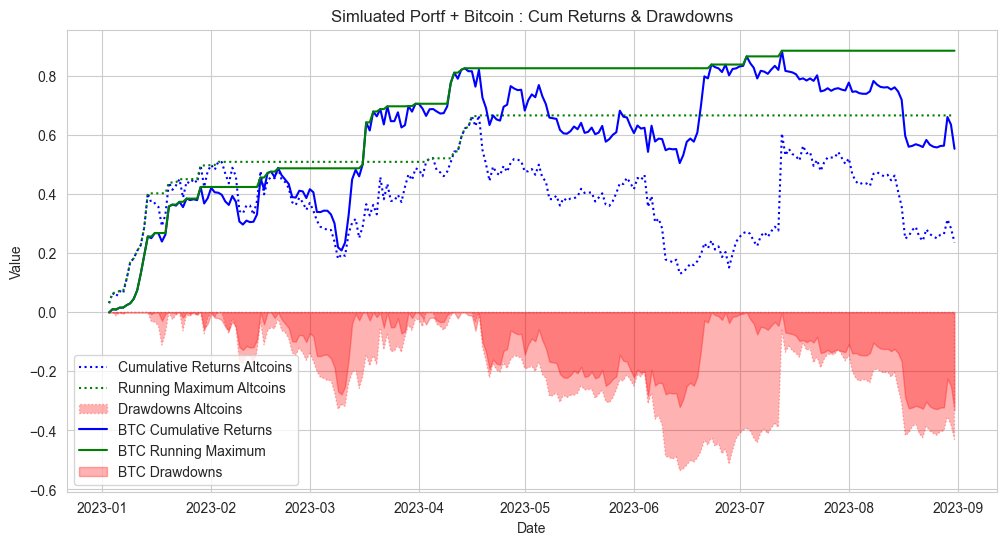

In [87]:
# Calculate running maximum
running_max = cumulative_returns_alts.cummax()
# Calculate drawdown
drawdown = cumulative_returns_alts - running_max

# Calculate running maximum
btc_running_max = cumulative_returns_btc.cummax()
# Calculate drawdown
btc_drawdown = cumulative_returns_btc - btc_running_max

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(cumulative_returns_alts, label='Cumulative Returns Altcoins', color='blue', ls="dotted" )
plt.plot(running_max, label='Running Maximum Altcoins', color='green',  ls="dotted")
plt.fill_between(drawdown.index, drawdown, color='red', alpha=0.3, label='Drawdowns Altcoins',  ls="dotted")

plt.plot(cumulative_returns_btc, label='BTC Cumulative Returns', color='blue')
plt.plot(btc_running_max, label='BTC Running Maximum', color='green')
plt.fill_between(btc_drawdown.index, btc_drawdown, color='red', alpha=0.3, label='BTC Drawdowns')

plt.title('Simluated Portf + Bitcoin : Cum Returns & Drawdowns')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

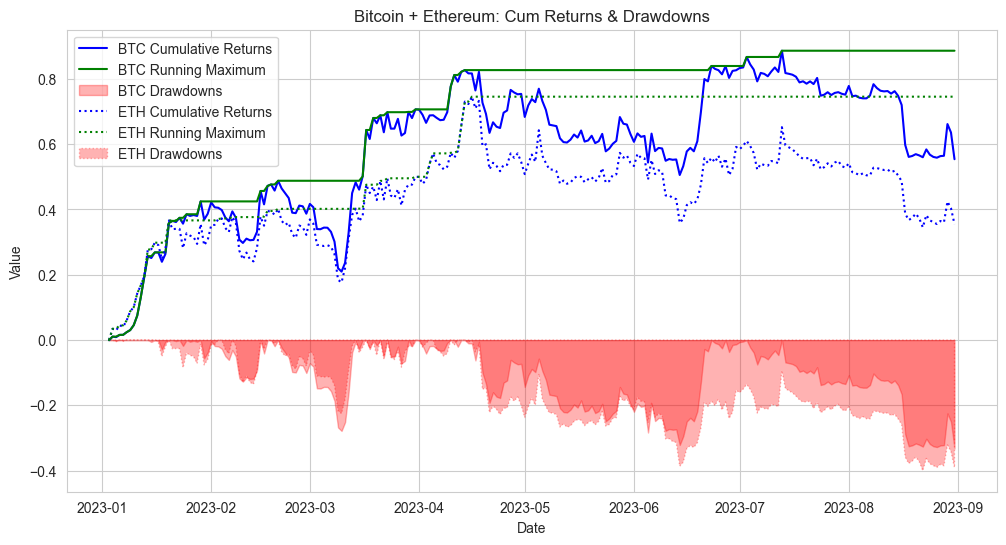

In [93]:
running_max = cumulative_returns_alts.cummax()
drawdown = cumulative_returns_alts - running_max
eth_running_max = cumulative_returns_eth.cummax()
eth_drawdown = cumulative_returns_eth - eth_running_max

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(cumulative_returns_btc, label='BTC Cumulative Returns', color='blue')
plt.plot(btc_running_max, label='BTC Running Maximum', color='green')
plt.fill_between(btc_drawdown.index, btc_drawdown, color='red', alpha=0.3, label='BTC Drawdowns')

plt.plot(cumulative_returns_eth, label='ETH Cumulative Returns', color='blue',ls="dotted")
plt.plot(eth_running_max, label='ETH Running Maximum', color='green',ls="dotted")
plt.fill_between(eth_drawdown.index, eth_drawdown, color='red', alpha=0.3, label='ETH Drawdowns',ls="dotted")

plt.title('Bitcoin + Ethereum: Cum Returns & Drawdowns')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

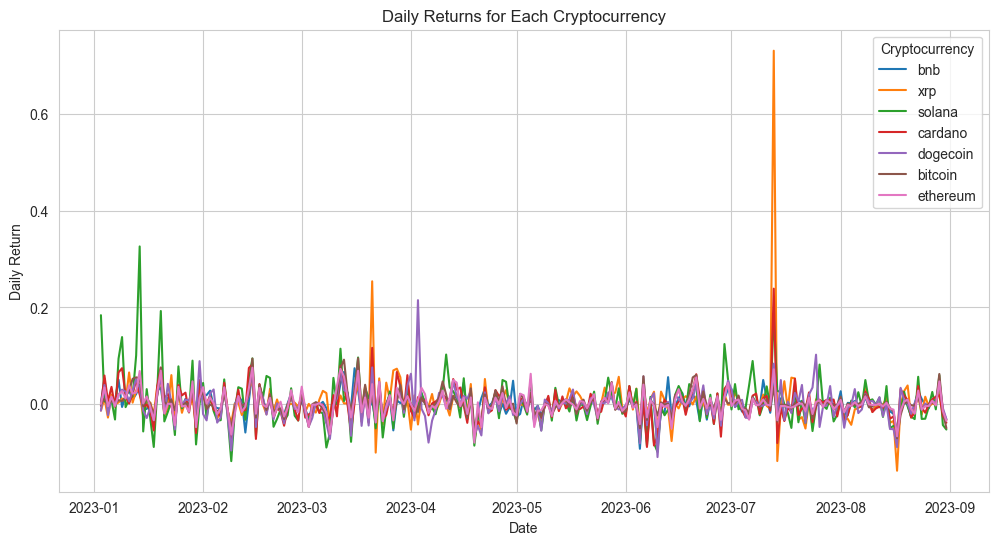

In [102]:
# Plot Daily Returns for All Cryptocurrencies
plt.figure(figsize=(12, 6))
plt.plot(pd.concat([daily_returns_alts, portfolio_daily_returns_btc, portfolio_daily_returns_eth], axis=1))
plt.title("Daily Returns for Each Cryptocurrency")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.legend(title="Cryptocurrency", labels= ["bnb","xrp","solana","cardano","dogecoin","bitcoin","ethereum"])
plt.show()

#### Daily Returns

XRP delivered an extreme daily return of over 60% in July 2023. This happened due to the favorable decision in the SEC vs. Ripple Labs Inc. trial. The increase in value has fully retraced since.

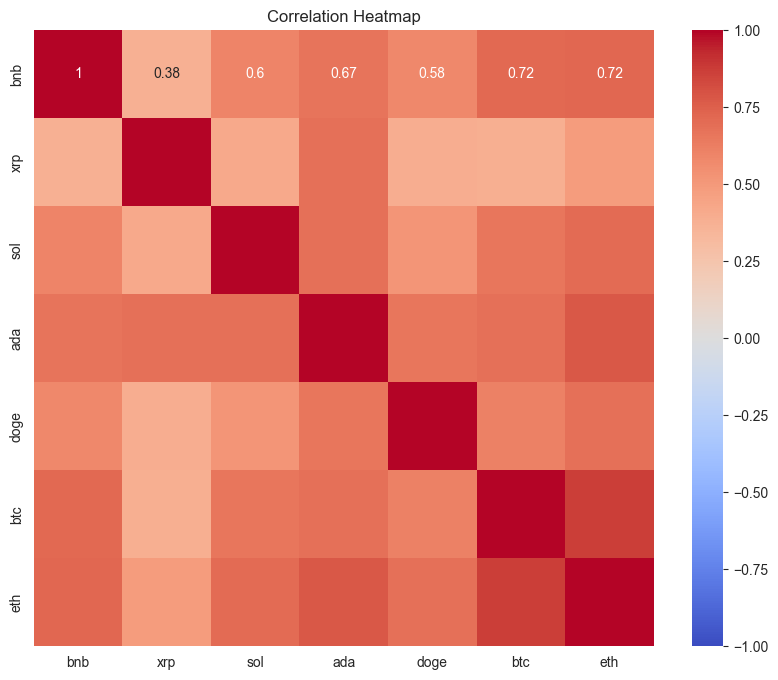

In [79]:
# Heatmap of Correlations between Cryptocurrencies
plt.figure(figsize=(10, 8))
corrs = pd.concat([daily_returns_alts, portfolio_daily_returns_btc, portfolio_daily_returns_eth], axis=1)
correlation = corrs.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

#### Interpretation
As expected, cryptoassets are highly correlated with BTC and ETH showing the strongest correlation. Only XRP appears to be have a lower correlation with the rest of the market. Probable reason for this was the highly anticipated SEC vs. Ripple Labs Inc. trial in July 2023.